The purpose of this notebook is to create the heatmap in Figure 1 of the paper.

This heatmap will show the number of ancestry-associated genes in each ancestry group.

Most ancestry-associated genes are associated with more than one ancestry groups, and this plot will demonstrate that clearly.

In [1]:
#Set up the environment
library(tidyverse)
library(reshape2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
#Load in the data.
#We created this dataset in New_Locus_Specific_Genetic_Dependencies.ipynb
setwd("/home/jupyter/Ancestry/analysis/locus_specific_associations")
cat.volcano.df = read.table("ancestry_locus_gene_associations.txt", sep = "\t", header = T)

In [31]:
#Massage a dataset so that we can make the heatmap.
processed.df = cat.volcano.df %>%
filter(FDR < 0.05) %>%
arrange(FDR) %>%
mutate(gene = as.factor(gene)) %>%
add_row(gene = "zzzz", pval = 1, difference = 1, ancestry = "SAS", FDR = 1) %>%
add_row(gene = "zzzz", pval = 1, difference = 1, ancestry = "AMR", FDR = 1) %>%
mutate(sig.snp = "asdf") %>%
mutate(ancestry = factor(ancestry, ordered = TRUE, level = c("SAS", "EUR", "EAS", "AMR", "AFR"))) 

head(processed.df)
str(processed.df)

,gene,pval,difference,ancestry,FDR,sig.snp
,<fct>,<dbl>,<dbl>,<ord>,<dbl>,<chr>
1,CLSPN,2.329197e-26,-0.22778549,EUR,1.908078e-21,asdf
2,CLSPN,1.635457e-23,0.22151204,EAS,6.698832e-19,asdf
3,RHD,3.924075e-13,-0.07203668,EAS,1.071534e-08,asdf
4,RHD,1.633492e-08,0.05415743,EUR,4.779132e-05,asdf
5,INCENP,1.870621e-12,0.15776234,EUR,3.831031e-08,asdf
6,INCENP,5.375445e-12,-0.15636480,EAS,7.339274e-08,asdf


'data.frame':	144 obs. of  6 variables:
 $ gene      : Factor w/ 99 levels "ABHD5","ACAN",..: 16 16 68 68 43 43 72 72 10 10 ...
 $ pval      : num  2.33e-26 1.64e-23 3.92e-13 1.63e-08 1.87e-12 ...
 $ difference: num  -0.2278 0.2215 -0.072 0.0542 0.1578 ...
 $ ancestry  : Ord.factor w/ 5 levels "SAS"<"EUR"<"EAS"<..: 2 3 3 2 2 3 2 3 3 2 ...
 $ FDR       : num  1.91e-21 6.70e-19 1.07e-08 4.78e-05 3.83e-08 ...
 $ sig.snp   : chr  "asdf" "asdf" "asdf" "asdf" ...


In [48]:
#Get lists of sig genes for each ancestry group
afr.genes = processed.df %>% filter(ancestry %in% "AFR") %>% filter(FDR < 0.05) %>% pull(gene)
amr.genes = processed.df %>% filter(ancestry %in% "AMR") %>% filter(FDR < 0.05) %>% pull(gene)
eas.genes = processed.df %>% filter(ancestry %in% "EAS") %>% filter(FDR < 0.05) %>% pull(gene)
eur.genes = processed.df %>% filter(ancestry %in% "EUR") %>% filter(FDR < 0.05) %>% pull(gene)
sas.genes = processed.df %>% filter(ancestry %in% "SAS") %>% filter(FDR < 0.05) %>% pull(gene)
eas.eur.genes = intersect(eas.genes, eur.genes) #Get a list of genes that are sig in both eas and eur
eas.not.eur.genes = setdiff(eas.genes, eur.genes) #Get a list of genes that are sig in eas but not eur
eur.not.eas.genes = setdiff(eur.genes, eas.genes) #Get a list of genes that ar sig in eur but not eas
afr.not.easeur.genes = setdiff(afr.genes, eas.genes) %>% setdiff(., eur.genes) #Get a list of afr genes that are not eas or eur genes
all.genes = processed.df %>% filter(FDR < 0.05) %>% pull(gene)
all.genes.not.afreaseur = setdiff(all.genes, eas.genes) %>% setdiff(., afr.genes) %>% setdiff(., eur.genes)

#Next step is to build a vector, conver that vector into a factor, and arrange the genes by that factorized vector
order.vector = c(eas.eur.genes, eas.not.eur.genes, eur.not.eas.genes, afr.not.easeur.genes, all.genes.not.afreaseur) %>%
as.factor()

length(eas.eur.genes)

[1] 44

In [41]:
#Now re-order everything and convert to a factor
processed.df = processed.df %>%
slice(order(factor(gene, levels = order.vector))) %>%
mutate(gene = factor(gene, levels = order.vector))

str(processed.df)

'data.frame':	144 obs. of  6 variables:
 $ gene      : Factor w/ 98 levels "CLSPN","RHD",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ pval      : num  2.33e-26 1.64e-23 3.92e-13 1.63e-08 1.87e-12 ...
 $ difference: num  -0.2278 0.2215 -0.072 0.0542 0.1578 ...
 $ ancestry  : Ord.factor w/ 5 levels "SAS"<"EUR"<"EAS"<..: 2 3 3 2 2 3 2 3 3 2 ...
 $ FDR       : num  1.91e-21 6.70e-19 1.07e-08 4.78e-05 3.83e-08 ...
 $ sig.snp   : chr  "asdf" "asdf" "asdf" "asdf" ...


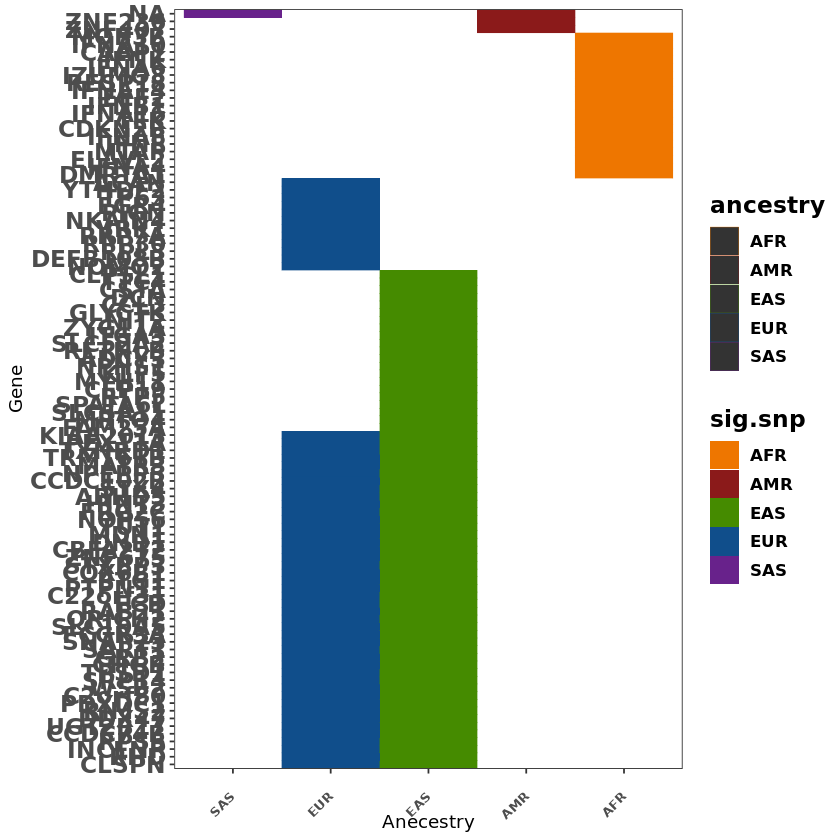

In [47]:
group.colors <- c(AFR = "darkorange2", AMR = "firebrick4", EAS = "chartreuse4", EUR = "dodgerblue4", SAS = "darkorchid4") #Make the color vector



processed.df %>%
ggplot(aes(x = gene, y = as.factor(ancestry), fill = sig.snp, color = ancestry)) +
geom_tile(aes(fill = ancestry)) +
scale_fill_manual(values = group.colors) +
scale_color_manual(values = group.colors) +


theme_bw() +

coord_flip() +


theme(
axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)
) +

theme(
#panel.border = element_blank(), 
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), 
#axis.line = element_line(color = "black")
) +

theme(
axis.text=element_text(size = 14, face = "bold"),
) +

theme(
legend.title = element_text(size = 14, face = "bold"),
legend.text = element_text(size = 10, face = "bold")
) +

theme(
axis.text.x = element_text(size = 8, angle = 45),
) +


xlab("Gene") +
ylab("Anecestry") 



#Put the exported image into the google bucket
setwd('/home/jupyter/Ancestry/figures')
ggsave("locus_ancestry_pval_heatmap.pdf", width = 5, height = 8)
system(glue::glue("
cd /home/jupyter/Ancestry/figures
gsutil cp locus_ancestry_pval_heatmap.pdf gs://fc-45c0e148-0b1c-4244-9bfc-feb559bbc514
"))